In [313]:
import pandas as pd
import numpy as numpy
import geopandas as gpd
#%matplotlib notebook

import math 
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplot, figure, subplots
sns.set()

In [324]:
today = "2020-08-01"

Data gathering. We have two datasets - one with Covid-19 data from DELV, as well as geographical data for each country

In [189]:
data = pd.read_csv('https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv')
data

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
0,ABW,2020-01-01,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17521.0,NaN,NaN,3.238519e-06,0.016900,220.264984,27.246809,26.732813,27.709375,9.019097
1,ABW,2020-01-02,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17521.0,NaN,NaN,6.755193e-07,0.016645,223.333893,27.049299,26.558985,27.508204,8.752604
2,ABW,2020-01-03,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17521.0,NaN,NaN,1.329184e-05,0.017244,220.742767,27.193014,26.695704,27.582422,8.564670
3,ABW,2020-01-04,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17521.0,NaN,NaN,1.788139e-07,0.016593,225.407074,27.267725,26.775782,27.771875,8.304688
4,ABW,2020-01-05,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17521.0,NaN,NaN,7.867813e-06,0.017142,219.864334,27.255766,26.965235,27.611719,5.604166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38480,AIA,2020-07-29,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38481,AIA,2020-07-30,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38482,AIA,2020-07-31,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38483,AIA,2020-08-01,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
data['DATE'] = pd.to_datetime(data['DATE'], format="%Y-%m-%d")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.iloc[43,3] = 'FRA'
world.iloc[21,3] = 'NOR'

merged = world.merge(data, left_on='iso_a3', right_on='ISO')
merged

type(merged['iso_a3'])

pandas.core.series.Series

In [406]:
merged.cases_new_per_million.tail()

34825    1.519
34826    0.000
34827    0.000
34828    0.000
34829    2.680
Name: cases_new_per_million, dtype: float64

We calculate covid19 cases per million for countries to be comparable to one another. We add two columns to the dataset - "cases_per_mln" and "excess_per_mln"

In [192]:
merged['cases_per_mln'] = merged.cases_total/merged.stats_population*1000000
merged['excess_per_mln'] = merged.deaths_excess_daily_avg/merged.stats_population*1000000



Calculate aggregate deaths per million

In [193]:
merged['aggregate_excess'] = 0
merged['log_cases'] = 0
countries = merged['country_name'].unique()
length = len(countries)
k=1
for i in range(length):
    temp = merged[merged.country_name == countries[i]]
    for j in range(k, len(temp)+k-1):
        
        merged.aggregate_excess.iloc[j] = merged.excess_per_mln.iloc[j] + merged.aggregate_excess.iloc[j-1]
        if (merged.cases_new_per_million.iloc[j] > 0 and merged.cases_new_per_million.iloc[j-1] > 0):
            merged.log_cases.iloc[j] = math.log(merged.cases_new_per_million.iloc[j]/merged.cases_new_per_million.iloc[j-1])
        else :
            merged.log_cases.iloc[j] = 0
    k = k + len(temp)

    

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [121]:
map_data.tail()

,iso_a3,lat,lon,pop_est,continent,name,gdp_md_est,geometry,ISO,DATE,...,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean,cases_per_mln,excess_per_mln,aggregate_excess,log_cases
36115,ZWE,-20.0,30.0,13805084,Africa,Zimbabwe,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",ZWE,2020-07-24,...,NaN,NaN,NaN,NaN,NaN,NaN,142.905903,NaN,NaN,-0.866205
36116,ZWE,-20.0,30.0,13805084,Africa,Zimbabwe,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",ZWE,2020-07-25,...,NaN,NaN,NaN,NaN,NaN,NaN,154.478320,NaN,NaN,0.647704
36117,ZWE,-20.0,30.0,13805084,Africa,Zimbabwe,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",ZWE,2020-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,163.763167,NaN,NaN,-0.220188
36118,ZWE,-20.0,30.0,13805084,Africa,Zimbabwe,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",ZWE,2020-07-27,...,NaN,NaN,NaN,NaN,NaN,NaN,169.011124,NaN,NaN,-0.570553
36119,ZWE,-20.0,30.0,13805084,Africa,Zimbabwe,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",ZWE,2020-07-28,...,NaN,NaN,NaN,NaN,NaN,NaN,181.929172,NaN,NaN,0.900775


In [194]:
lat_lon = pd.read_csv('countries_codes_and_coordinates.csv')

map_data = lat_lon.merge(merged, left_on='iso_a3', right_on = 'iso_a3')

In [195]:
temp = map_data[['DATE', 'country_name', 'lat', 'lon', 'cases_per_mln']]
temp = temp[temp['DATE'] == today]
temp

,DATE,country_name,lat,lon,cases_per_mln
203,2020-07-22,Afghanistan,33.0,65.0,917.763231
418,2020-07-22,Albania,41.0,20.0,1490.722079
633,2020-07-22,Algeria,28.0,3.0,553.647036
848,2020-07-22,Angola,-12.5,18.5,22.789323
1063,2020-07-22,Argentina,-34.0,-64.0,2893.212788
...,...,...,...,...,...
36108,2020-07-22,Viet Nam,16.0,106.0,4.119641
36323,2020-07-22,Viet Nam,16.0,106.0,4.119641
36538,2020-07-22,Yemen,15.0,48.0,54.616836
36753,2020-07-22,Zambia,-15.0,30.0,180.918623


In [196]:
import folium

In [197]:
map = folium.Map(location=[20, 20], zoom_start=2.4)

for i in range(len(temp)):
    folium.Circle([temp.iloc[i]['lat'], temp.iloc[i]['lon']],radius=20*temp.iloc[i]['cases_per_mln']).add_to(map)

map

In [198]:
temp2 = map_data[['DATE', 'country_name', 'lat', 'lon', 'npi_stringency_index']]
temp2 = temp2[temp2['DATE'] == "2020-04-01"]
temp2

,DATE,country_name,lat,lon,npi_stringency_index
91,2020-04-01,Afghanistan,33.0,65.0,67.59
306,2020-04-01,Albania,41.0,20.0,84.26
521,2020-04-01,Algeria,28.0,3.0,86.57
736,2020-04-01,Angola,-12.5,18.5,90.74
951,2020-04-01,Argentina,-34.0,-64.0,100.00
...,...,...,...,...,...
35996,2020-04-01,Viet Nam,16.0,106.0,96.30
36211,2020-04-01,Viet Nam,16.0,106.0,96.30
36426,2020-04-01,Yemen,15.0,48.0,38.89
36641,2020-04-01,Zambia,-15.0,30.0,47.22


In [199]:
map = folium.Map(location=[20, 20], zoom_start=2.4)

for i in range(len(temp2)):
    folium.Circle([temp2.iloc[i]['lat'], temp2.iloc[i]['lon']],radius=1000*temp2.iloc[i]['npi_stringency_index']).add_to(map)

map

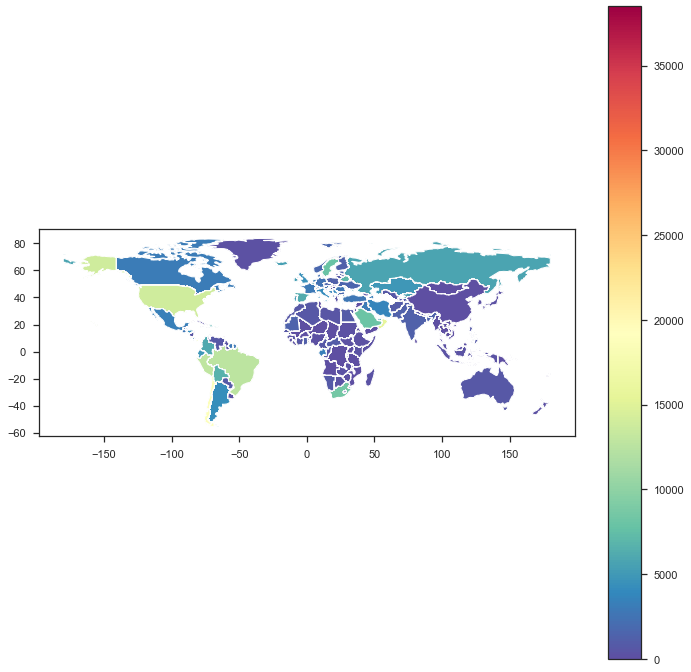

In [200]:
map_cases_per_mln = merged[['DATE', 'country_name', 'cases_per_mln', 'geometry']]
ax = map_cases_per_mln.plot(column="cases_per_mln", cmap='Spectral_r', figsize=(12, 12), legend=True)

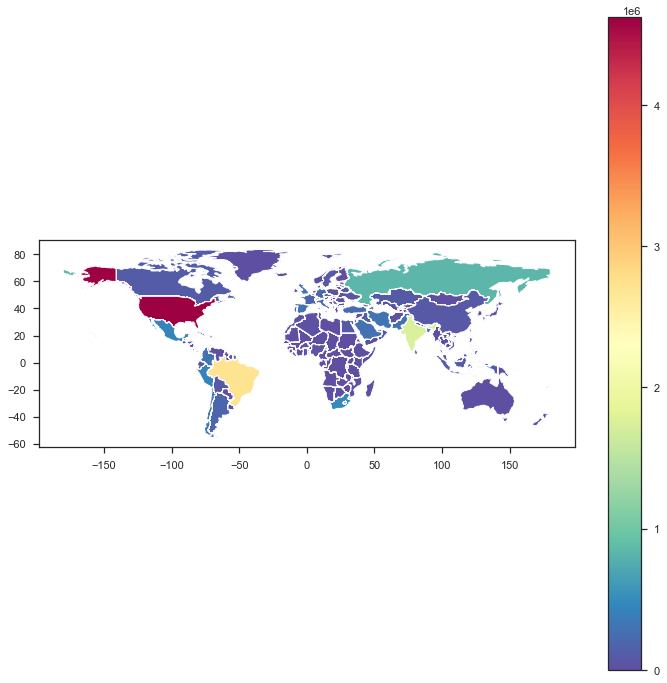

In [201]:
map_cases_per_mln = merged[['DATE', 'country_name', 'cases_total', 'geometry']]
ax = map_cases_per_mln.plot(column='cases_total', cmap='Spectral_r', figsize=(12, 12), k=10, legend=True)

In [202]:
merged_agg_excess = merged[['DATE', 'country_name', 'aggregate_excess', 'geometry', "continent"]]
merged_agg_excess.dropna(inplace=True)
#merged
#merged[merged['continent'] == "Europe"]
#merged[merged['country_name'] =='Germany'].head(50)
#[merged['DATE'] =='2020-05-15']

temp = merged[merged['continent'] == "Europe"]
europe = temp['country_name'].unique()

data_europe = merged[merged['country_name'].isin(europe)]
data_europe_agg_excess = merged_agg_excess[merged_agg_excess['country_name'].isin(europe)]




C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


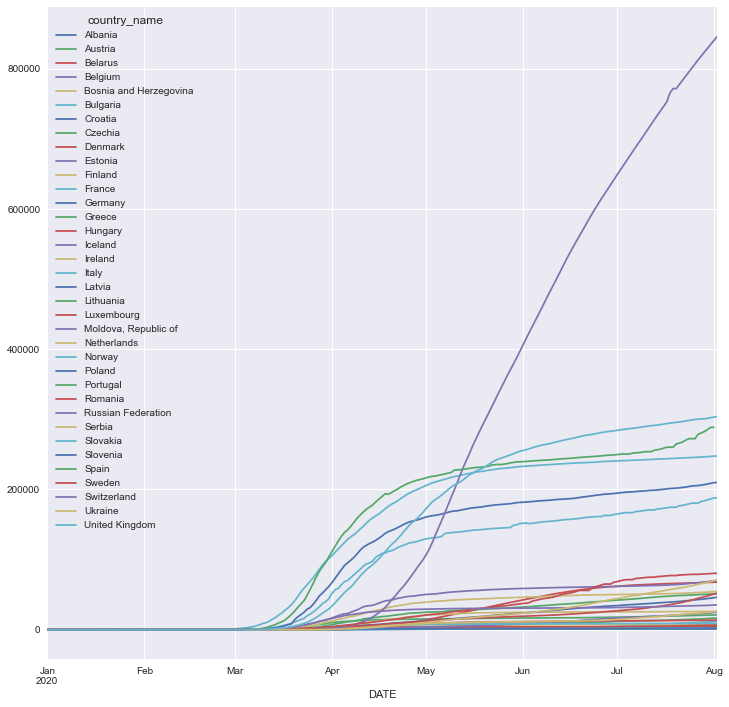

In [203]:
## fig, ax = plt.subplots(2,2)

plt.style.use('seaborn')

ax = data_europe[['DATE', 'country_name', 'cases_total']]
ax.pivot(index="DATE", columns="country_name", values="cases_total").plot(figsize=(12,12))



#data_europe['DATE'] = data_europe['DATE'].apply(pd.Timestamp)
#df=df.set_index('DATE')
#df.plot(marker='o')
#plt.axvline(pd.Timestamp('2013-09-21'),color='r')




In [204]:
key_countries = data_europe[data_europe['country_name'].isin([ "France","United Kingdom", "Sweden", "Italy", "Germany", "Spain", "Lithuania"])].copy()

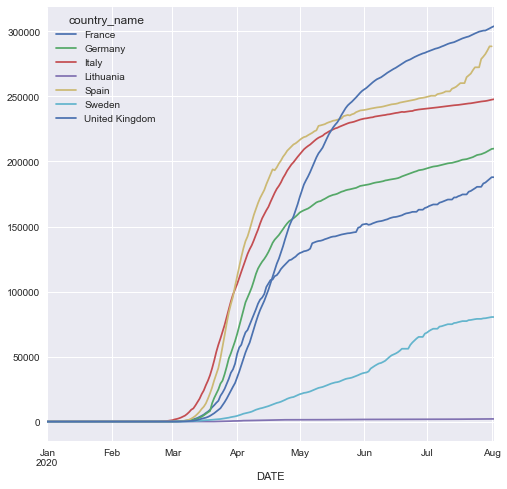

In [205]:
plt.style.use('seaborn')

ax = key_countries[['DATE', 'country_name', 'cases_total']]
ax.pivot(index="DATE", columns="country_name", values="cases_total").plot(figsize=(8,8))


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


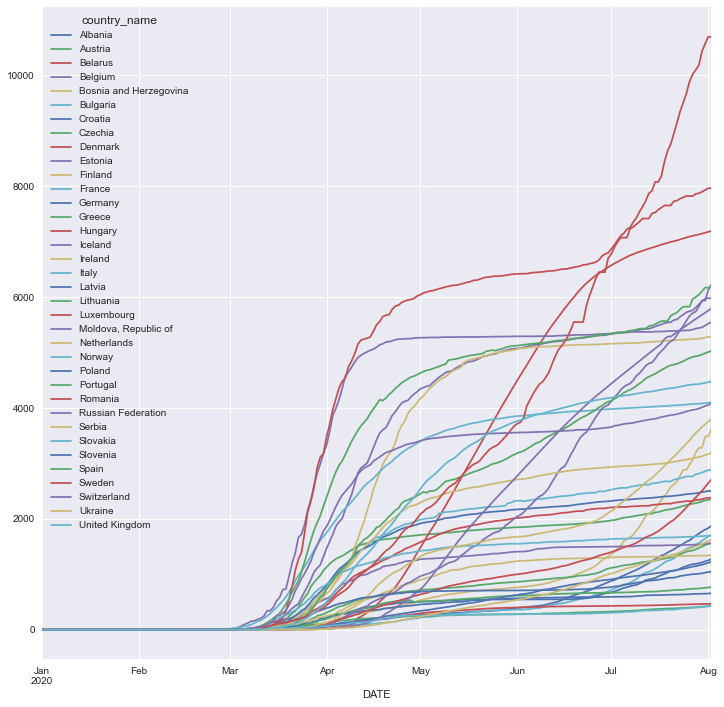

In [206]:
df = data_europe[['DATE', 'country_name', 'cases_per_mln']]
#df = merged[['DATE', 'country_name', 'cases_per_mln']]
df.dropna(inplace=True)
df.pivot(index="DATE", columns="country_name", values="cases_per_mln").plot(figsize=(12,12))

Here we plot excess deaths per million for European countries


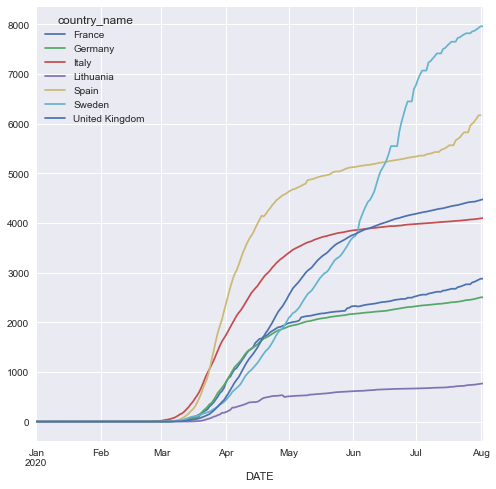

In [250]:
plt.style.use('seaborn')

ax = key_countries[['DATE', 'country_name', "cases_per_mln"]]
ax.pivot(index="DATE", columns="country_name", values="cases_per_mln").plot(figsize=(8,8))

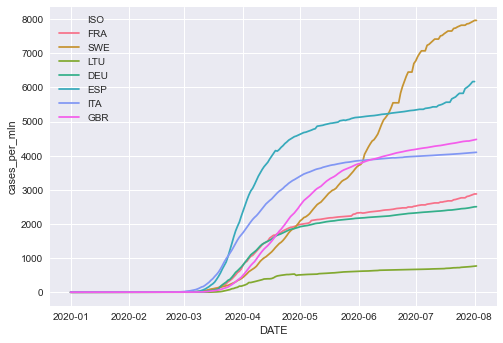

In [208]:
g = sns.lineplot(data = key_countries, x = 'DATE', y = 'cases_per_mln', hue = 'ISO')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


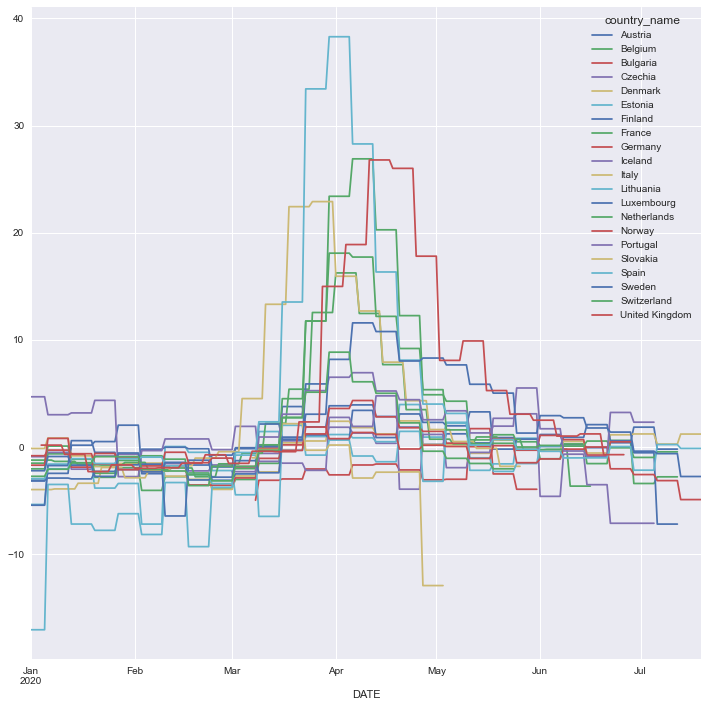

In [209]:
df2 = data_europe[['DATE', 'country_name', 'excess_per_mln']]
df2.dropna(inplace=True)
#df2.describe()
df2.pivot(index="DATE", columns="country_name", values="excess_per_mln").plot(figsize=(12,12))

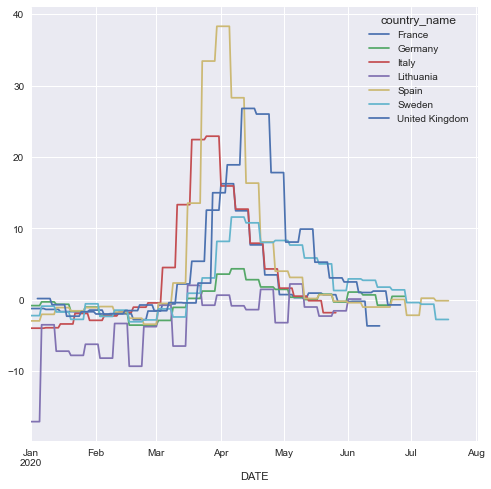

In [318]:
plt.style.use('seaborn')

ax = key_countries[['DATE', 'country_name', "excess_per_mln"]]
ax.pivot(index="DATE", columns="country_name", values="excess_per_mln").plot(figsize=(8,8))

In [211]:
data[data['country_name'] =='Ecuador'].deaths_excess_daily_avg.describe()

count     182.000000
mean      547.841052
std       663.257621
min         2.571429
25%        27.642857
50%       456.642857
75%       513.357143
max      1970.571429
Name: deaths_excess_daily_avg, dtype: float64

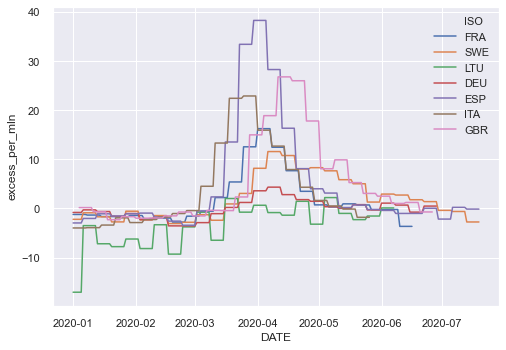

In [317]:
g = sns.lineplot(data = key_countries, x = 'DATE', y = 'excess_per_mln', hue = 'ISO')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


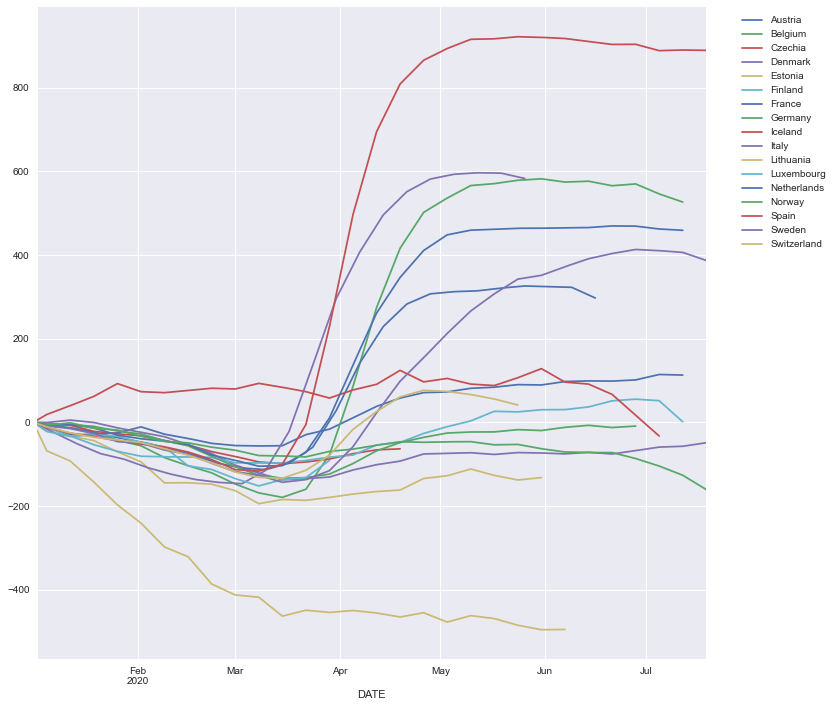

In [212]:
df2 = data_europe[['DATE', 'country_name', 'aggregate_excess']]
df2["aggregate_excess"] = df2["aggregate_excess"].replace({0:numpy.nan})
df2.dropna(inplace=True)

df2.pivot(index="DATE", columns="country_name", values="aggregate_excess").plot(figsize=(12,12))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


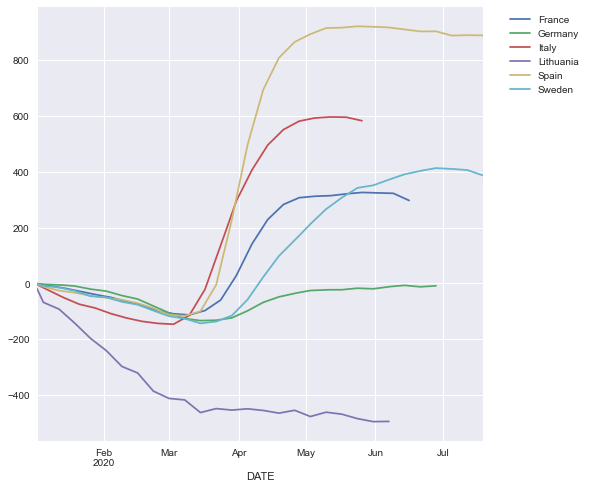

In [213]:
df3 = key_countries[['DATE', 'country_name', 'aggregate_excess']]
df3["aggregate_excess"] = df3["aggregate_excess"].replace({0:numpy.nan})
df3.dropna(inplace=True)

df3.pivot(index="DATE", columns="country_name", values="aggregate_excess").plot(figsize=(8,8))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [405]:
key_countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ISO,DATE,country_name,npi_school_closing,...,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean,cases_per_mln,excess_per_mln,aggregate_excess,log_cases
8385,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FRA,2020-01-01,France,0.0,...,0.004635,31.944342,3.414663,0.695025,6.174550,2.075990,0.000000,-1.221235,0.000000,0.000000
8386,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FRA,2020-01-02,France,0.0,...,0.005503,34.681908,6.123374,3.572436,8.809396,2.806159,0.000000,-1.221235,-1.221235,0.000000
8387,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FRA,2020-01-03,France,0.0,...,0.006055,37.093795,8.233695,5.704820,10.655964,4.079863,0.000000,-1.221235,-2.442470,0.000000
8388,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FRA,2020-01-04,France,0.0,...,0.005077,48.152657,6.357896,3.329518,8.926622,3.255151,0.000000,-1.221235,-3.663704,0.000000
8389,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FRA,2020-01-05,France,0.0,...,0.004952,41.272182,5.916429,3.795035,8.411799,1.920807,0.000000,-1.221235,-4.884939,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29020,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",GBR,2020-07-29,United Kingdom,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4429.366619,NaN,NaN,-1.667835
29021,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",GBR,2020-07-30,United Kingdom,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4440.606049,NaN,NaN,2.388861
29022,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",GBR,2020-07-31,United Kingdom,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4453.068117,NaN,NaN,0.103294
29023,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",GBR,2020-08-01,United Kingdom,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4466.031025,NaN,NaN,0.039415


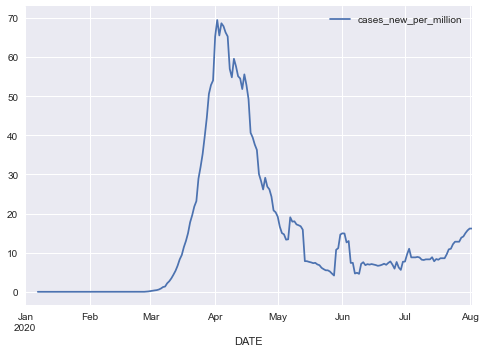

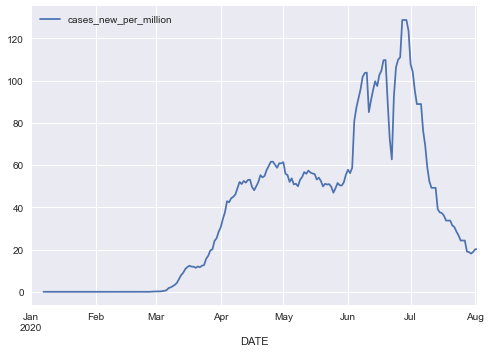

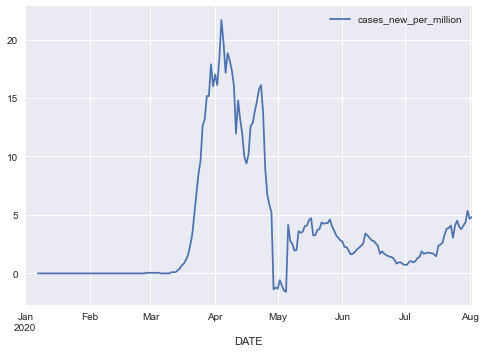

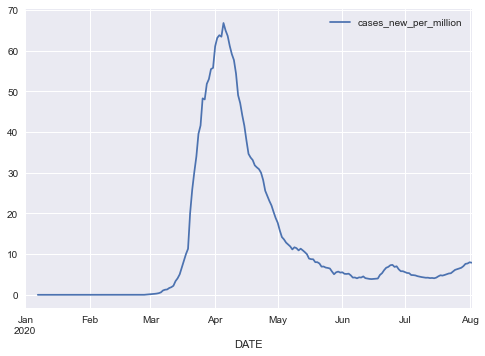

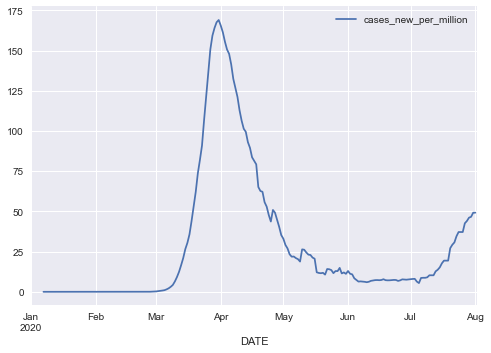

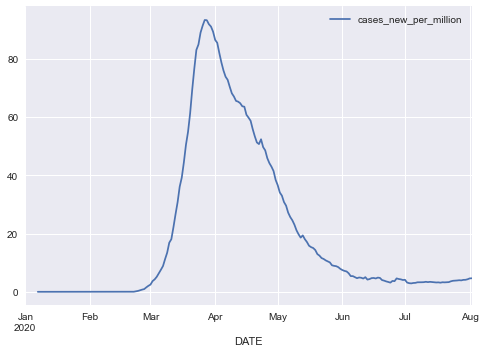

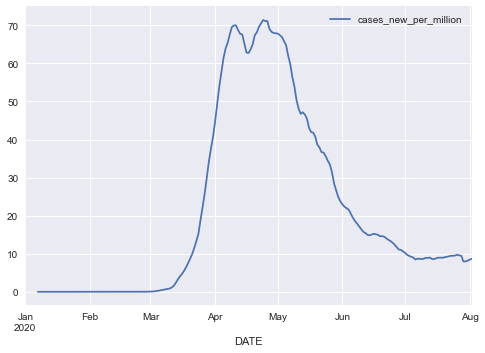

In [426]:
df3 = key_countries[['DATE', 'country_name', 'cases_new_per_million']]

temp_countries = df3['country_name'].unique()
length = len(temp_countries)

for i in range(length):
    temp = df3[df3.country_name == temp_countries[i]]
    temp = temp[['DATE', 'cases_new_per_million']]
    temp.set_index('DATE', inplace = True)
    temp.rolling(7).mean().plot(label = "7 Day Rolling Average UK")

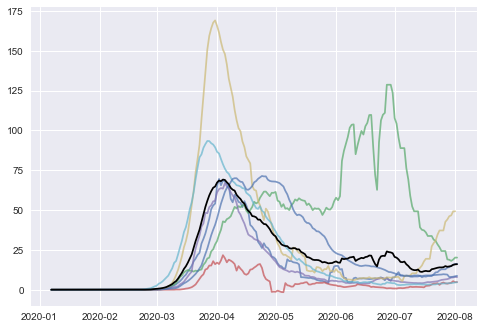

In [440]:
df3 = key_countries[['DATE', 'country_name', 'cases_new_per_million']]

temp_countries = df3['country_name'].unique()
length = len(temp_countries)
fig = plt.figure()

for i in range(length):
    temp = df3[df3.country_name == temp_countries[i]]
    temp = temp[['DATE', 'cases_new_per_million']]
    temp.set_index('DATE', inplace = True)
    plt.plot(temp.rolling(7).mean(), alpha = 0.7)

mean = df3.groupby('DATE').mean()
mean = mean.rolling(7).mean()
plt.plot(mean, color='black')
plt.show()

#df3.groupby('DATE').mean().reset_index()  


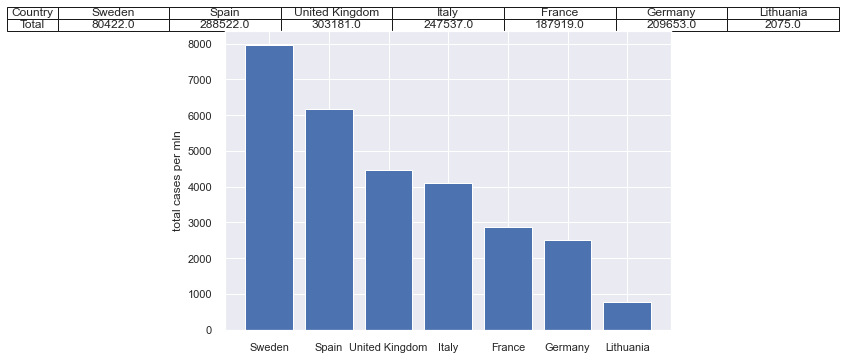

In [316]:
latest_date = key_countries[key_countries.DATE == today]
latest_date = latest_date.sort_values('cases_per_mln', ascending=False)

plt.bar(latest_date.country_name, latest_date.cases_per_mln, data=latest_date, align='center')
plt.xticks(latest_date.country_name)
plt.ylabel('total cases per mln')


summary = pd.DataFrame([latest_date.country_name, latest_date.cases_total],index=['Country','Total'])

plt.table(cellText=summary.values,colWidths = [0.25]*len(latest_date.columns),
          rowLabels=summary.index,
          cellLoc = 'center', rowLoc = 'center',
          loc='top')


plt.show()


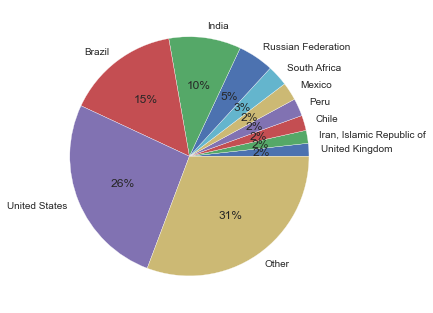

In [397]:
temp = merged[merged['DATE'] == today]

temp = temp[['country_name', 'cases_total']]
temp.dropna(inplace=True)

temp.loc[temp['cases_total'] <= 300000, 'country_name'] = 'Other'  

df = temp.groupby('country_name').sum().reset_index()
df = df.sort_values('cases_total')

plt.pie(df.cases_total, labels=df.country_name, autopct='%1.f%%')
plt.show()

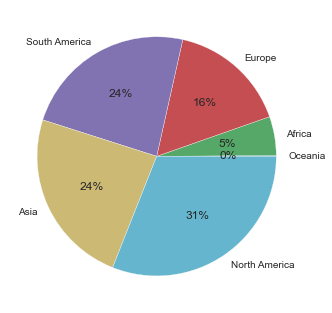

In [400]:
temp = merged[merged['DATE'] == today]

temp = temp[['continent', 'cases_total']]
temp.dropna(inplace=True)


df = temp.groupby('continent').sum().reset_index()
df = df.sort_values('cases_total')

plt.pie(df.cases_total, labels=df.continent, autopct='%1.f%%')
plt.show()

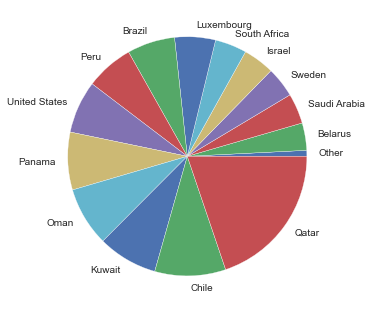

In [398]:
temp = merged[merged['DATE'] == today]

temp = temp[['country_name', 'cases_per_mln']]
temp.dropna(inplace=True)

temp.loc[temp['cases_per_mln'] <= 7000, 'country_name'] = 'Other'  

df = temp.groupby('country_name').mean().reset_index()
df = df.sort_values('cases_per_mln')

plt.pie(df.cases_per_mln, labels=df.country_name)
plt.show()

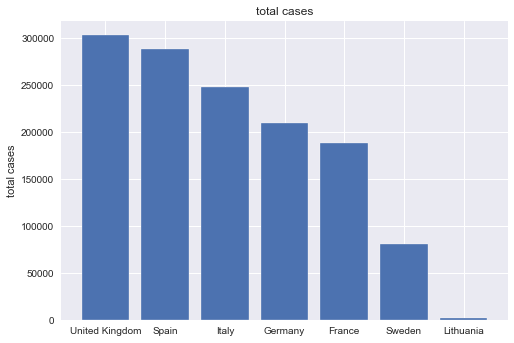

In [298]:
latest_date = latest_date.sort_values('cases_total', ascending=False)

plt.bar(latest_date.country_name, latest_date.cases_total, data=latest_date, align='center')
plt.xticks(latest_date.country_name)
plt.ylabel('total cases')
plt.title('total cases')

summary = pd.DataFrame([latest_date.country_name, latest_date.cases_total],index=['Country','Total'])

plt.table(cellText=summary.values,colWidths = [0.25]*len(latest_date.columns),
          rowLabels=summary.index,
          cellLoc = 'center', rowLoc = 'center',
          loc='top')

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


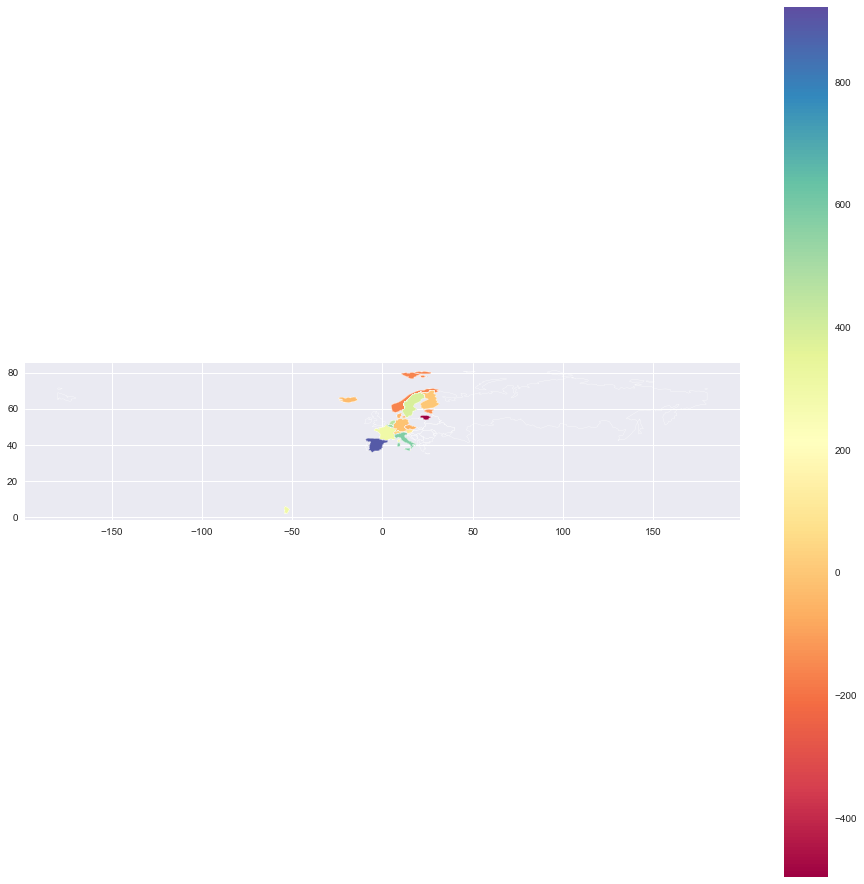

In [404]:
data_europe_agg_excess["aggregate_excess"] = data_europe_agg_excess["aggregate_excess"].replace({0:numpy.nan})

ax = data_europe_agg_excess.plot(column="aggregate_excess", cmap='Spectral', figsize=(16, 16), k=20, legend=True)

In [215]:
dat1 = merged[['country_name','DATE','log_cases']]
dat2 = merged[['country_name','DATE', 'npi_masks','npi_stringency_index', 'npi_testing_policy', 'npi_internal_movement_restrictions']]


weekly_data1 = dat1.groupby('country_name').resample('W-Wed', label='right', closed = 'right', on='DATE').sum().reset_index()
weekly_data2 = dat2.groupby('country_name').resample('W-Wed', label='right', closed = 'right', on='DATE').mean().reset_index()

In [216]:
merge_regression = pd.merge(weekly_data2, weekly_data1)
merge_regression['log_cases'] = merge_regression['log_cases'].replace(0, numpy.nan)
merge_regression.dropna(inplace=True)
merge_regression.head()

,country_name,DATE,npi_masks,npi_stringency_index,npi_testing_policy,npi_internal_movement_restrictions,log_cases
11,Afghanistan,2020-03-18,0.0,36.112857,1.0,0.000000,-1.085709
12,Afghanistan,2020-03-25,0.0,45.505714,1.0,0.142857,-1.617250
13,Afghanistan,2020-04-01,0.0,65.210000,1.0,1.000000,3.257050
14,Afghanistan,2020-04-08,0.0,73.938571,1.0,1.000000,0.389418
15,Afghanistan,2020-04-15,0.0,81.877143,1.0,1.571429,0.490385


In [217]:
X = merge_regression.iloc[:, 2:6].values
y = merge_regression.iloc[:, 6].values


In [218]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 0] = labelencoder.fit_transform(X[:, 0])

#onehotencoder = OneHotEncoder(categorical_features =[0])
#X = onehotencoder.fit_transform(X).toarray()
#print(X[0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [219]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
y_pred = regressor.predict(X_test)


In [221]:
print(regressor.coef_)

[-0.06608901 -0.00482001 -0.06176338  0.02217474]


In [222]:
print(regressor.intercept_)

0.6141846852870438


In [223]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.0181904274390291

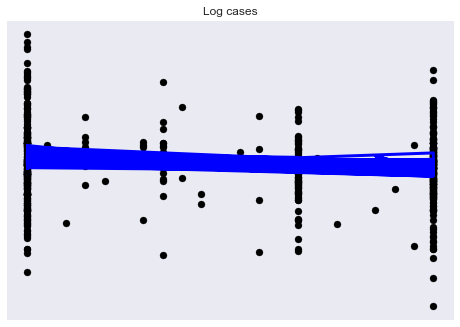

In [224]:
plt.scatter(X_test[:,0], y_test,  color='black')
plt.plot(X_test[:,0], y_pred, color='blue', linewidth=3)

plt.title("Log cases")
plt.xticks(())
plt.yticks(())

plt.show()

In [225]:
key_countries.describe()

,pop_est,gdp_md_est,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,...,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean,cases_per_mln,excess_per_mln,aggregate_excess,log_cases
count,1.505000e+03,1.505000e+03,1465.000000,1465.000000,1465.000000,1466.000000,1466.000000,1466.000000,1467.000000,1466.000000,...,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1504.000000,1231.000000,1057.000000,1505.000000
mean,4.804999e+07,1.994389e+06,1.561775,1.180887,1.189761,2.165075,0.349932,0.653479,0.784594,1.943383,...,0.006523,151.492606,11.279773,7.471491,15.045776,3.798104,1753.983107,2.025766,81.643288,0.014969
std,2.777688e+07,1.259174e+06,1.318391,1.133526,0.928174,1.742865,0.507611,0.840107,0.850300,1.588418,...,0.002410,82.434521,6.357339,5.624790,7.179878,1.584934,1965.907605,7.423741,359.647557,0.454546
min,2.823859e+06,8.562000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001930,4.753486,-2.191623,-5.158324,-0.034618,1.429417,0.000000,-17.054963,-495.947820,-2.162363
25%,9.960487e+06,4.981000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004592,77.319949,6.267252,3.071175,9.465011,2.603324,0.179032,-1.748919,-108.916196,-0.091373
50%,6.213780e+07,2.221000e+06,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,1.000000,2.000000,...,0.006022,162.046394,10.672535,6.731723,14.704984,3.364473,773.267506,-0.298387,-27.135497,0.000000
75%,6.710616e+07,2.788000e+06,3.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,3.000000,...,0.008244,218.237734,15.893222,11.973869,20.257221,4.643517,3076.856952,2.772979,312.342843,0.118274
max,8.059402e+07,3.979000e+06,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,...,0.014112,297.297142,26.864594,20.532084,33.433522,11.348970,7963.149812,38.291575,921.959150,2.856993


In [226]:
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


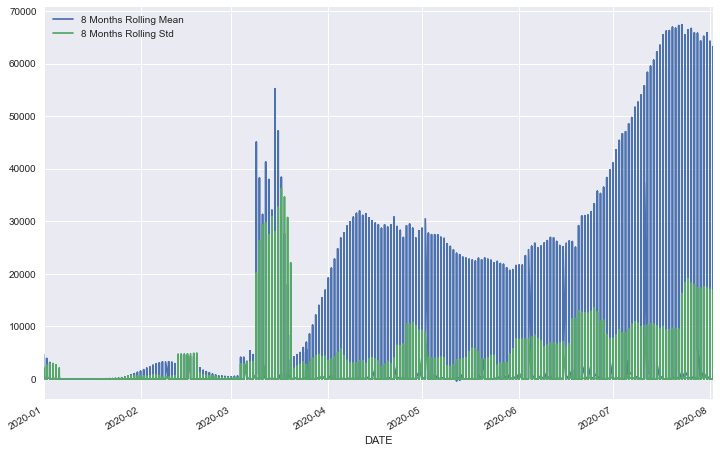

In [227]:
######################## Global 7 day moving average for new cases #####################333333

dat3 = merged[['DATE','cases_new']]

dat3.set_index('DATE', inplace = True)
dat3.dropna(inplace = True)

plt.figure(figsize=(12,8))

time_series = dat3['cases_new']

temp = time_series.rolling(7).mean().plot(label = "8 Months Rolling Mean")
time_series.rolling(7).std().plot(label = "8 Months Rolling Std")
plt.legend()

#dat3.plot()
#time_series.plot()

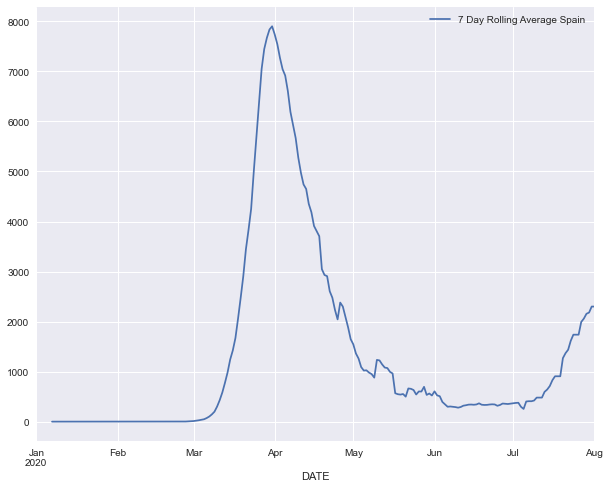

In [416]:
#################### Rolling averages of New cases #####################

dat3_new = merged[['DATE','country_name','cases_new']]


##################### SPAIN rolling average ############################

dat3_SPA = dat3_new[dat3_new['country_name'].isin([ "Spain"])]
dat3_SPA = dat3_SPA[['DATE','cases_new']]

dat3_SPA.set_index('DATE', inplace = True)
dat3_SPA.dropna(inplace = True)

plt.figure(figsize=(10,8))

time_series2 = dat3_SPA['cases_new']
temp2 = time_series2.rolling(7).mean().plot(label = "7 Day Rolling Average Spain")

plt.legend()

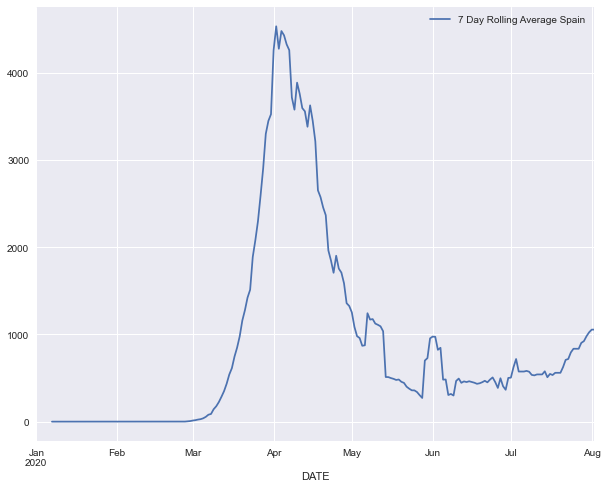

In [229]:
##################### France rolling average new cases ############################

dat3_FR = dat3_new[dat3_new['country_name'].isin([ "France"])]
dat3_FR = dat3_FR[['DATE','cases_new']]

dat3_FR.set_index('DATE', inplace = True)
dat3_FR.dropna(inplace = True)

plt.figure(figsize=(10,8))

time_series2 = dat3_FR['cases_new']
#time_series2.rolling(30).std().plot(label = "8 Months Rolling Std")
temp2 = time_series2.rolling(7).mean().plot(label = "7 Day Rolling Average Spain")

plt.legend()

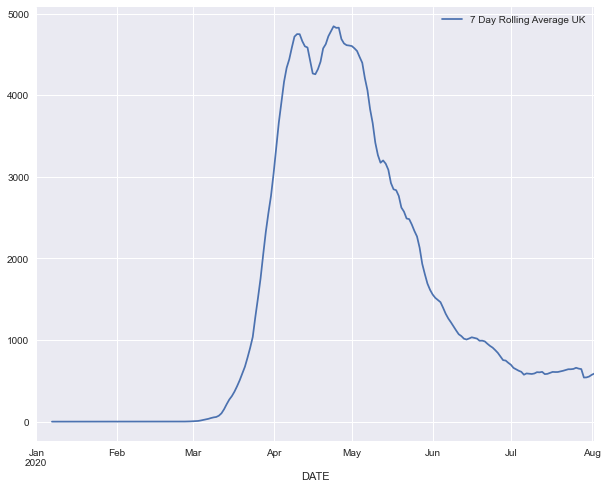

In [230]:
##################### UK rolling average ############################

dat3_UK = dat3_new[dat3_new['country_name'].isin(["United Kingdom"])]
dat3_UK = dat3_UK[['DATE','cases_new']]

dat3_UK.set_index('DATE', inplace = True)
dat3_UK.dropna(inplace = True)

plt.figure(figsize=(10,8))

time_series2 = dat3_UK['cases_new']
#time_series2.rolling(30).std().plot(label = "8 Months Rolling Std")
temp2 = time_series2.rolling(7).mean().plot(label = "7 Day Rolling Average UK")

plt.legend()

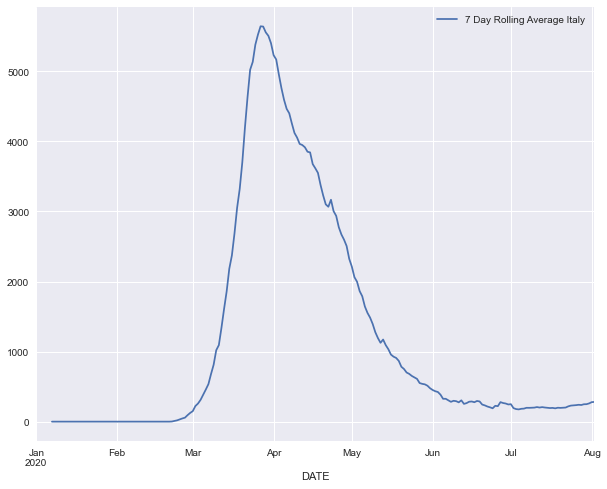

In [231]:
##################### UK rolling average ############################

dat3_IT = dat3_new[dat3_new['country_name'].isin(["Italy"])]
dat3_IT = dat3_IT[['DATE','cases_new']]

dat3_IT.set_index('DATE', inplace = True)
dat3_IT.dropna(inplace = True)

plt.figure(figsize=(10,8))

time_series2 = dat3_IT['cases_new']
#time_series2.rolling(30).std().plot(label = "8 Months Rolling Std")
temp2 = time_series2.rolling(7).mean().plot(label = "7 Day Rolling Average Italy")

plt.legend()


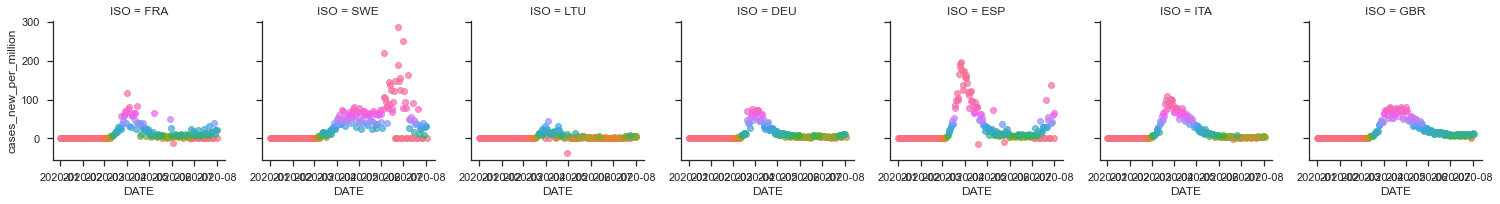

In [453]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

g = sns.FacetGrid(key_countries, col='ISO', hue='cases_new_per_million')
g.map(plt.scatter, "DATE", "cases_new_per_million", alpha = .7)
#g.add_legend();

In [462]:
key_countries.tests_new_per_thousand.describe()

count    466.000000
mean       0.896285
std        0.670876
min        0.000000
25%        0.421750
50%        0.734000
75%        1.274000
max        2.990000
Name: tests_new_per_thousand, dtype: float64

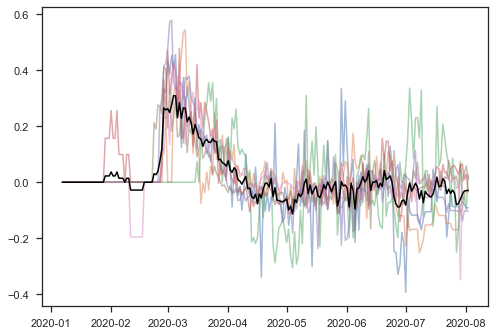

In [466]:
df3 = key_countries[['DATE', 'country_name', 'log_cases']]

temp_countries = df3['country_name'].unique()
length = len(temp_countries)
fig = plt.figure()

for i in range(length):
    temp = df3[df3.country_name == temp_countries[i]]
    temp = temp[['DATE', 'log_cases']]
    temp.set_index('DATE', inplace = True)
    plt.plot(temp.rolling(7).mean(), alpha = 0.5)

mean = df3.groupby('DATE').mean()
mean = mean.rolling(7).mean()
plt.plot(mean, color='black')
plt.show()


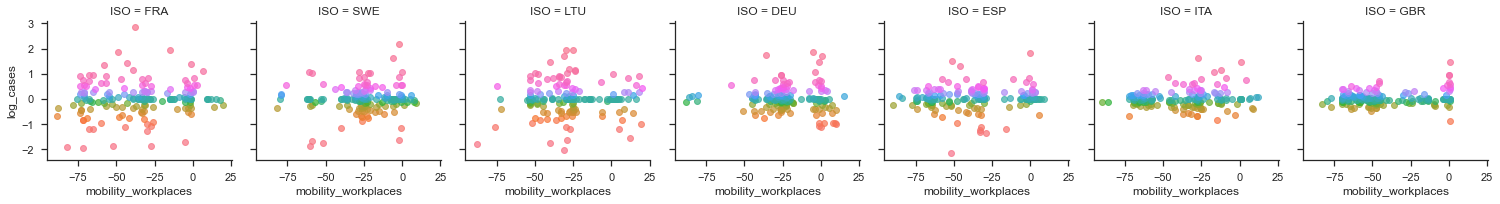

In [467]:
sns.set(style="ticks")

g = sns.FacetGrid(key_countries, col='ISO', hue="log_cases")
g.map(plt.scatter, "mobility_workplaces", "log_cases", alpha = .7)

Rolling averages for log cases

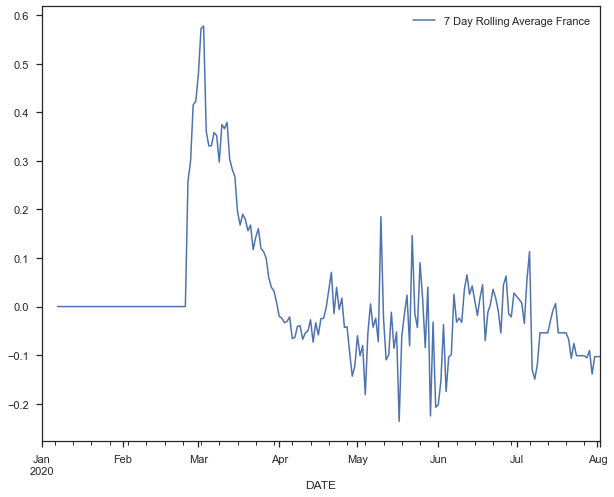

In [242]:
#################### Rolling averages of New cases #####################

dat4 = merged[['DATE','country_name','log_cases']]

##################### Spain rolling average ############################

dat4_SPA = dat4[dat4['country_name'].isin([ "Spain"])]
dat4_SPA = dat4_SPA[['DATE','log_cases']]

dat4_SPA.set_index('DATE', inplace = True)
dat4_SPA.dropna(inplace = True)

plt.figure(figsize=(10,8))

time_series2 = dat4_SPA['log_cases']
#time_series2.rolling(30).std().plot(label = "8 Months Rolling Std")
temp2 = time_series2.rolling(7).mean().plot(label = "7 Day Rolling Average France")

plt.legend()

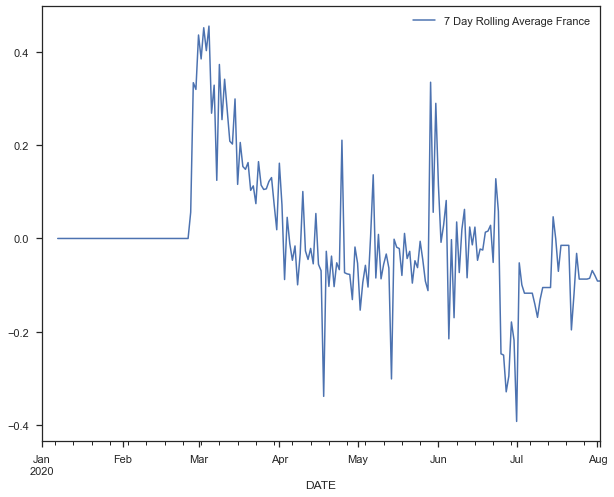

In [243]:
##################### France rolling average ############################

dat4_FR = dat4[dat4['country_name'].isin([ "France"])]
dat4_FR = dat4_FR[['DATE','log_cases']]

dat4_FR.set_index('DATE', inplace = True)
dat4_FR.dropna(inplace = True)

plt.figure(figsize=(10,8))

time_series2 = dat4_FR['log_cases']
#time_series2.rolling(30).std().plot(label = "8 Months Rolling Std")
temp2 = time_series2.rolling(7).mean().plot(label = "7 Day Rolling Average France")

plt.legend()

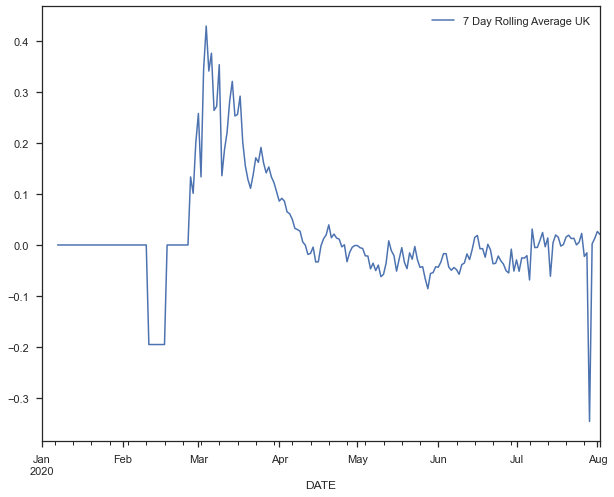

In [244]:
##################### UK rolling average ############################

dat4_UK = dat4[dat4['country_name'].isin([ "United Kingdom"])]
dat4_UK = dat4_UK[['DATE','log_cases']]

dat4_UK.set_index('DATE', inplace = True)
dat4_UK.dropna(inplace = True)

plt.figure(figsize=(10,8))

time_series2 = dat4_UK['log_cases']
#time_series2.rolling(30).std().plot(label = "8 Months Rolling Std")
temp2 = time_series2.rolling(7).mean().plot(label = "7 Day Rolling Average UK")

plt.legend()

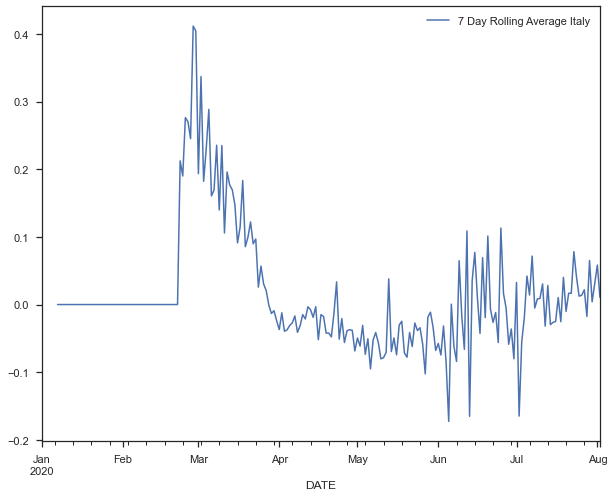

In [245]:
##################### Italy rolling average ############################

dat4_IT = dat4[dat4['country_name'].isin([ "Italy"])]
dat4_IT = dat4_IT[['DATE','log_cases']]

dat4_IT.set_index('DATE', inplace = True)
dat4_IT.dropna(inplace = True)

plt.figure(figsize=(10,8))

time_series2 = dat4_IT['log_cases']
#time_series2.rolling(30).std().plot(label = "8 Months Rolling Std")
temp2 = time_series2.rolling(7).mean().plot(label = "7 Day Rolling Average Italy")

plt.legend()

In [238]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


dftest = adfuller(dat3['cases_new'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                -1.297105e+01
p-value                        3.080700e-24
#lags used                     4.900000e+01
Number of observations used    2.673600e+04
Critical Value (1%)           -3.430595e+00
Critical Value (5%)           -2.861648e+00
Critical Value (10%)          -2.566828e+00
dtype: float64


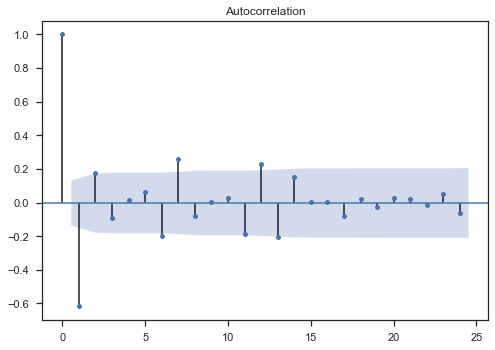

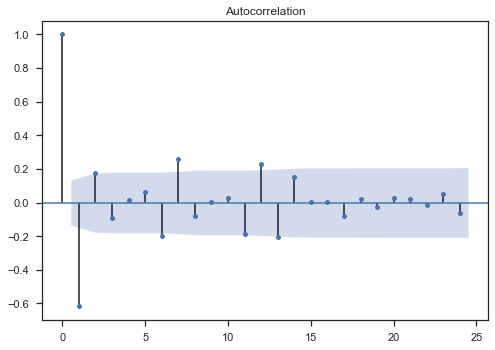

In [239]:
cases_diff = dat4_SPA.diff(periods=1)
cases_diff.dropna(inplace = True)
#plt.plot(cases_diff.DATE, cases_diff.cases_new)
#cases_diff.plot()

plot_acf(cases_diff)

In [240]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(dat4_SPA, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              log_cases   No. Observations:                  215
Model:                     ARMA(2, 2)   Log Likelihood                 -99.616
Method:                       css-mle   S.D. of innovations              0.384
Date:                Mon, 03 Aug 2020   AIC                            211.231
Time:                        15:44:23   BIC                            231.455
Sample:                    01-01-2020   HQIC                           219.403
                         - 08-02-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0143      0.042      0.340      0.734      -0.068       0.097
ar.L1.log_cases     1.4084      0.119     11.826      0.000       1.175       1.642
ar.L2.log_cases    -0.4576      

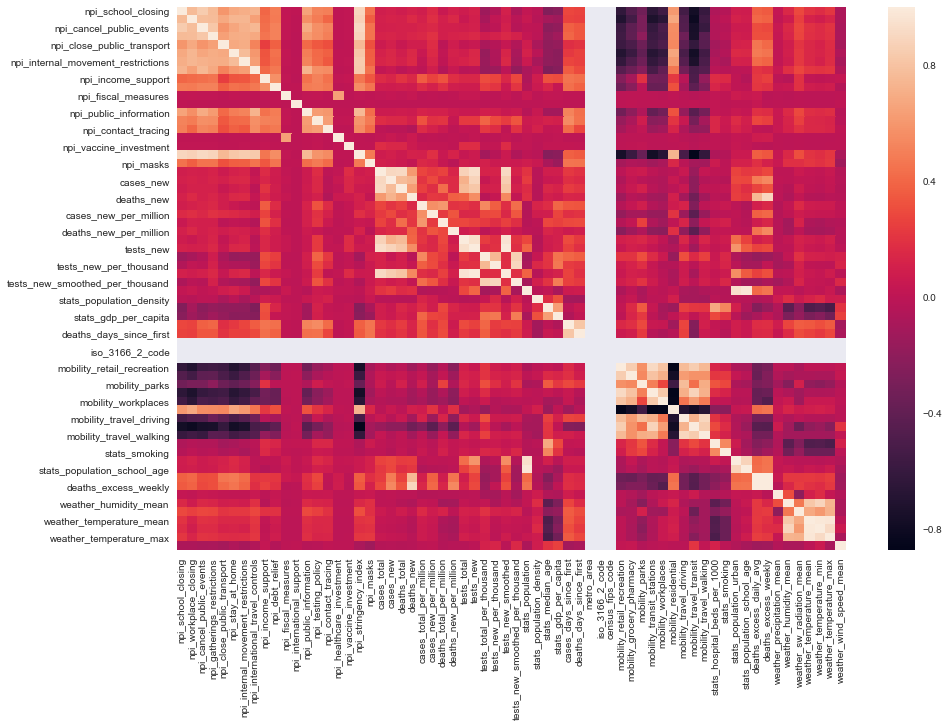

In [253]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())

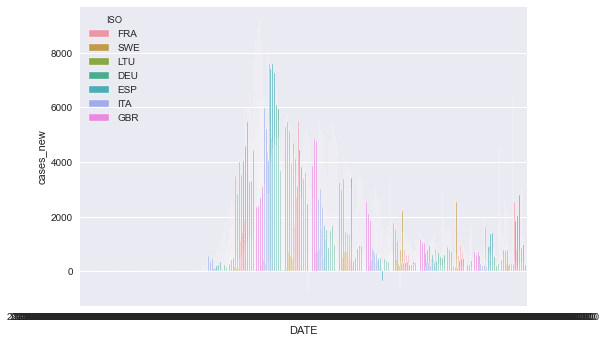

In [258]:
g = sns.barplot(data = key_countries, x = 'DATE', y = 'cases_new', hue = 'ISO')

In [452]:
import plotly.express as px

boxplot = key_countries[['DATE', 'country_name', 'cases_new_per_million']]

df = px.data.tips()
fig = px.box(boxplot, x ="country_name", y = "cases_new_per_million", color="country_name")
fig.show()